In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('sales_data_sample.csv', encoding='latin')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [3]:
df.drop(['ORDERNUMBER', 'ORDERDATE', 'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE', 'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME'], axis=1, inplace=True)


In [4]:
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,DEALSIZE
0,30,95.70,2,2871.00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,Small
1,34,81.35,5,2765.90,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,Small
2,41,94.74,2,3884.34,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,Medium
3,45,83.26,6,3746.70,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,Medium
4,49,100.00,14,5205.27,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,Medium


In [5]:
df.drop(['QTR_ID', 'STATUS', 'PRODUCTCODE', 'PHONE'], axis=1, inplace=True)


In [6]:
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,CUSTOMERNAME,DEALSIZE
0,30,95.70,2,2871.00,2,2003,Motorcycles,95,Land of Toys Inc.,Small
1,34,81.35,5,2765.90,5,2003,Motorcycles,95,Reims Collectables,Small
2,41,94.74,2,3884.34,7,2003,Motorcycles,95,Lyon Souveniers,Medium
3,45,83.26,6,3746.70,8,2003,Motorcycles,95,Toys4GrownUps.com,Medium
4,49,100.00,14,5205.27,10,2003,Motorcycles,95,Corporate Gift Ideas Co.,Medium


In [7]:
df.drop(['CUSTOMERNAME'], axis=1, inplace=True)

In [8]:
df.PRODUCTLINE.value_counts()

PRODUCTLINE
Classic Cars        967
Vintage Cars        607
Motorcycles         331
Planes              306
Trucks and Buses    301
Ships               234
Trains               77
Name: count, dtype: int64

In [9]:
df.DEALSIZE.value_counts()

DEALSIZE
Medium    1384
Small     1282
Large      157
Name: count, dtype: int64

In [10]:
df_pl = pd.get_dummies(df['PRODUCTLINE'], dtype='int')
df_ds = pd.get_dummies(df['DEALSIZE'], dtype='int')

In [11]:
df_one_hot = pd.concat([df_pl, df_ds, df], axis=1)
df_one_hot.head()

,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,DEALSIZE
0,0,1,0,0,0,0,0,0,0,1,30,95.70,2,2871.00,2,2003,Motorcycles,95,Small
1,0,1,0,0,0,0,0,0,0,1,34,81.35,5,2765.90,5,2003,Motorcycles,95,Small
2,0,1,0,0,0,0,0,0,1,0,41,94.74,2,3884.34,7,2003,Motorcycles,95,Medium
3,0,1,0,0,0,0,0,0,1,0,45,83.26,6,3746.70,8,2003,Motorcycles,95,Medium
4,0,1,0,0,0,0,0,0,1,0,49,100.00,14,5205.27,10,2003,Motorcycles,95,Medium


In [12]:
df_one_hot.drop(['PRODUCTLINE','DEALSIZE'],axis=1,inplace=True)

C:\Users\siddharth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


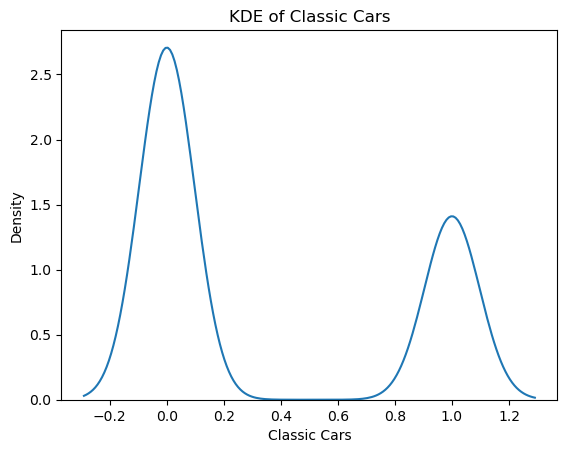

C:\Users\siddharth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


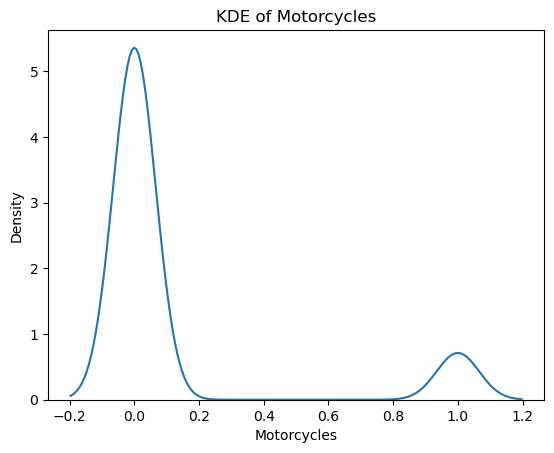

C:\Users\siddharth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


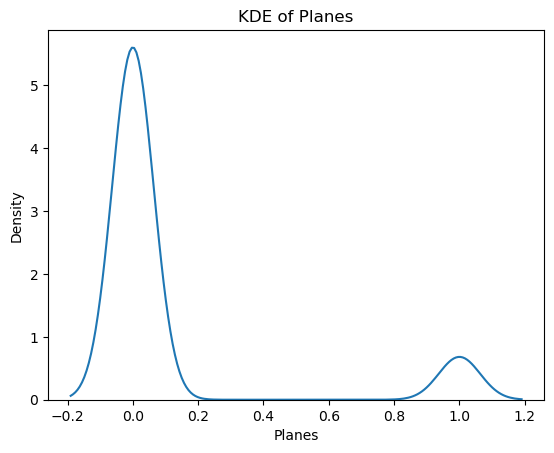

C:\Users\siddharth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


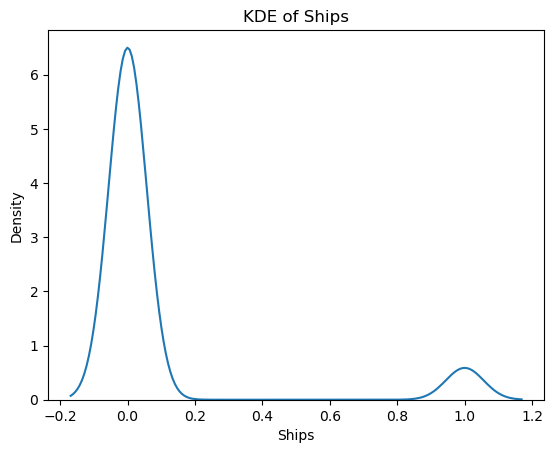

C:\Users\siddharth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


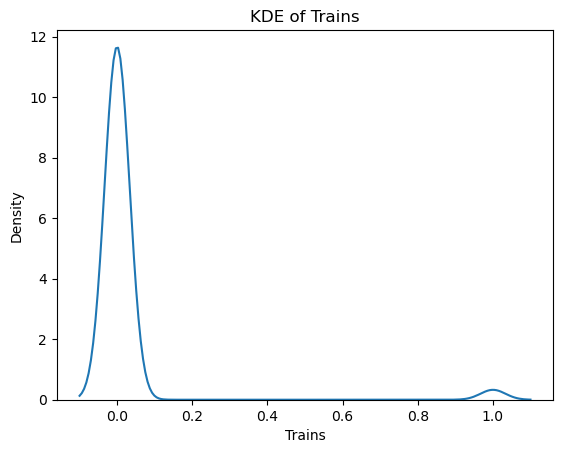

C:\Users\siddharth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


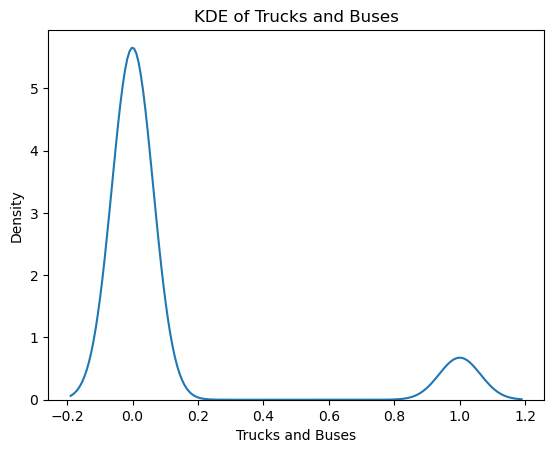

C:\Users\siddharth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


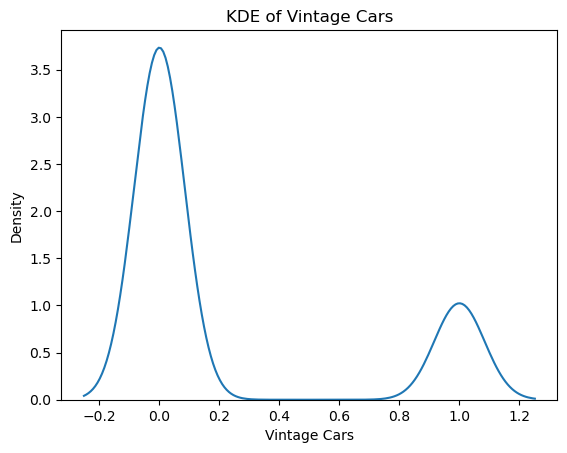

C:\Users\siddharth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


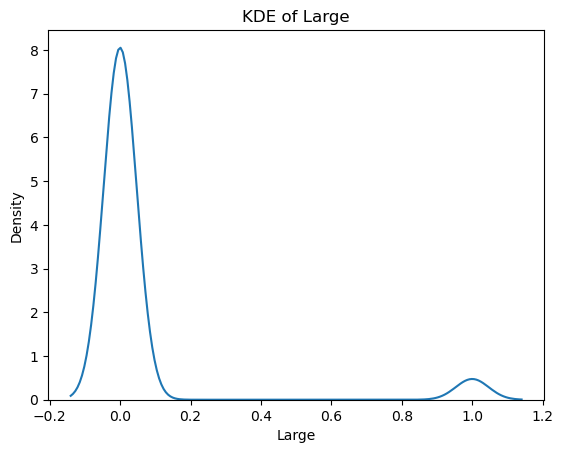

C:\Users\siddharth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


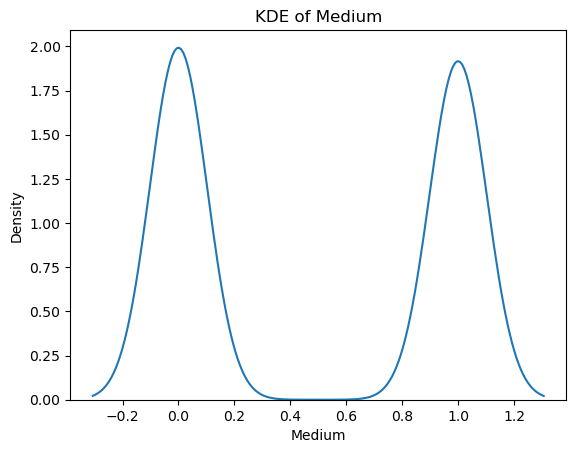

C:\Users\siddharth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


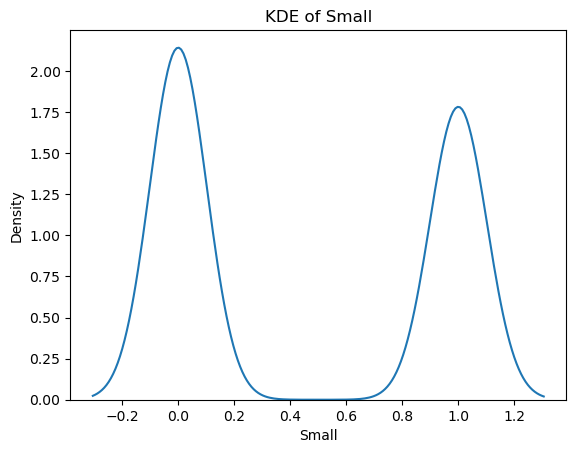

C:\Users\siddharth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


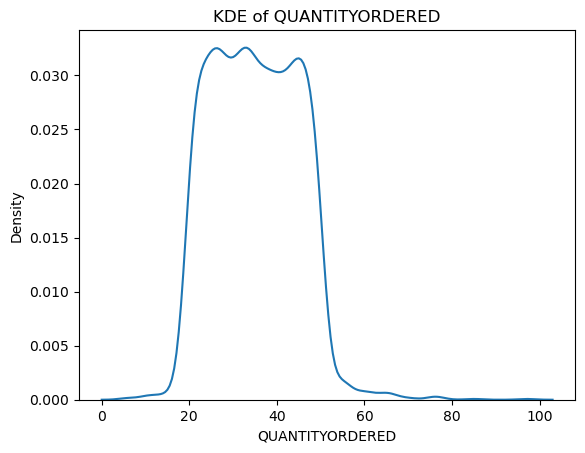

C:\Users\siddharth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


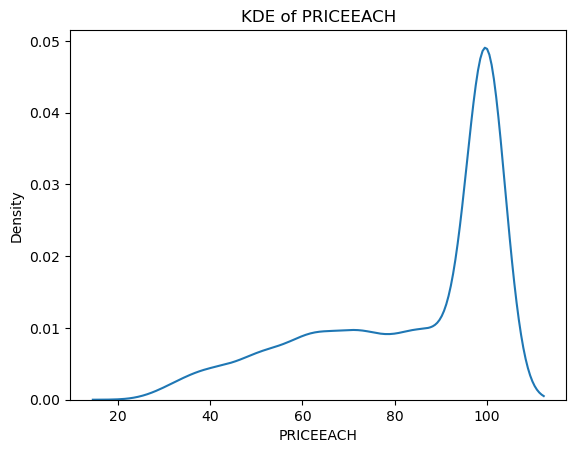

C:\Users\siddharth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


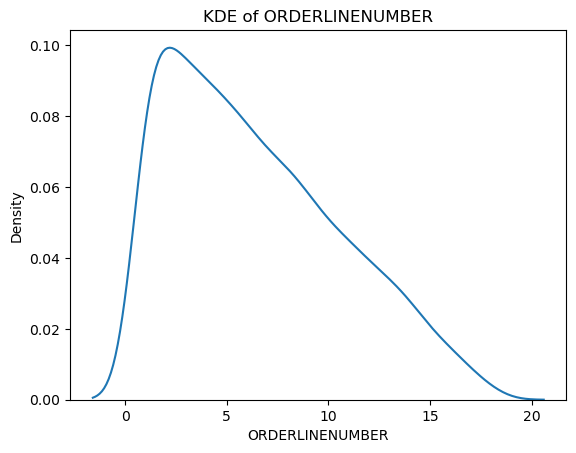

C:\Users\siddharth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


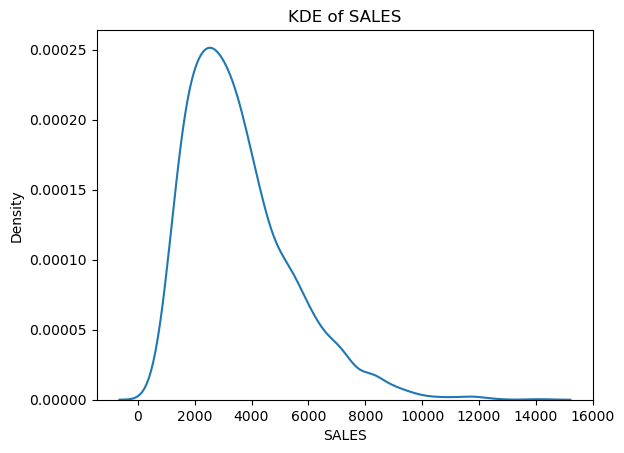

C:\Users\siddharth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


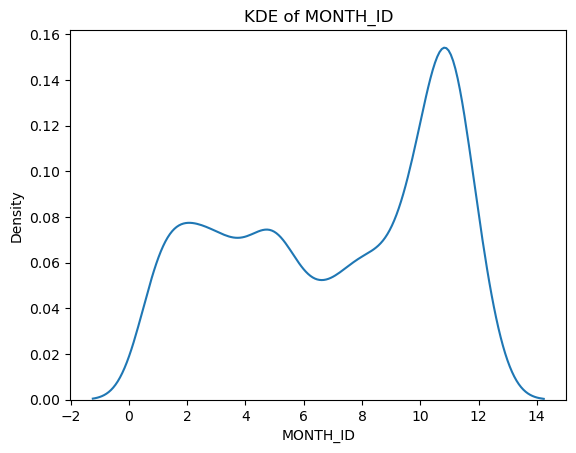

C:\Users\siddharth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


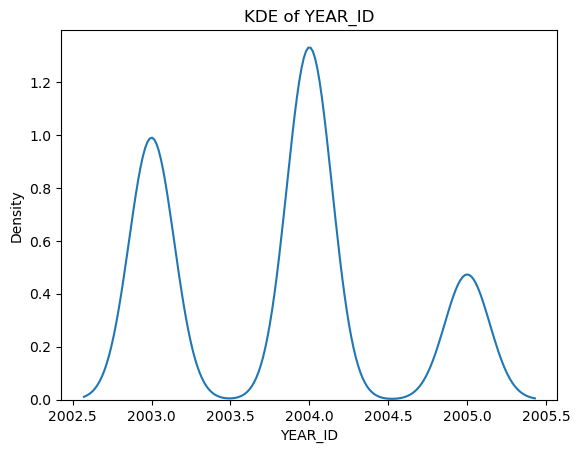

C:\Users\siddharth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


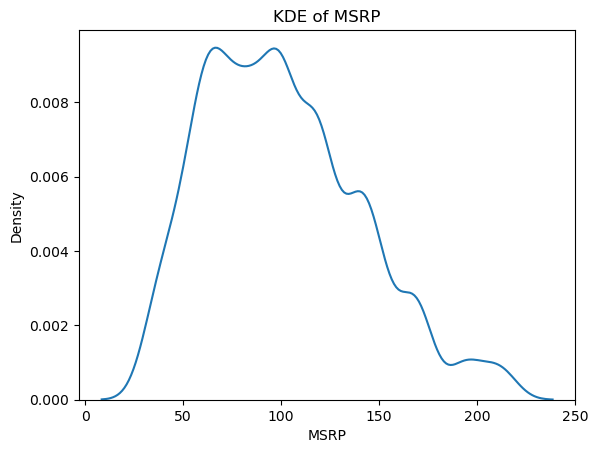

In [13]:
numerical_cols = [col for col in df_one_hot.columns if df_one_hot[col].dtype != 'object']

for col in numerical_cols:
    sns.kdeplot(df_one_hot[col])
    plt.title(f'KDE of {col}')
    plt.show()

In [14]:
df_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Classic Cars      2823 non-null   int32  
 1   Motorcycles       2823 non-null   int32  
 2   Planes            2823 non-null   int32  
 3   Ships             2823 non-null   int32  
 4   Trains            2823 non-null   int32  
 5   Trucks and Buses  2823 non-null   int32  
 6   Vintage Cars      2823 non-null   int32  
 7   Large             2823 non-null   int32  
 8   Medium            2823 non-null   int32  
 9   Small             2823 non-null   int32  
 10  QUANTITYORDERED   2823 non-null   int64  
 11  PRICEEACH         2823 non-null   float64
 12  ORDERLINENUMBER   2823 non-null   int64  
 13  SALES             2823 non-null   float64
 14  MONTH_ID          2823 non-null   int64  
 15  YEAR_ID           2823 non-null   int64  
 16  MSRP              2823 non-null   int64  


In [21]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

df_scaled = pd.DataFrame(ss.fit_transform(df_one_hot), columns=ss.get_feature_names_out())

C:\Users\siddharth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(
C:\Users\siddharth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(
C:\Users\siddharth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(
C:\Users\siddharth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a me

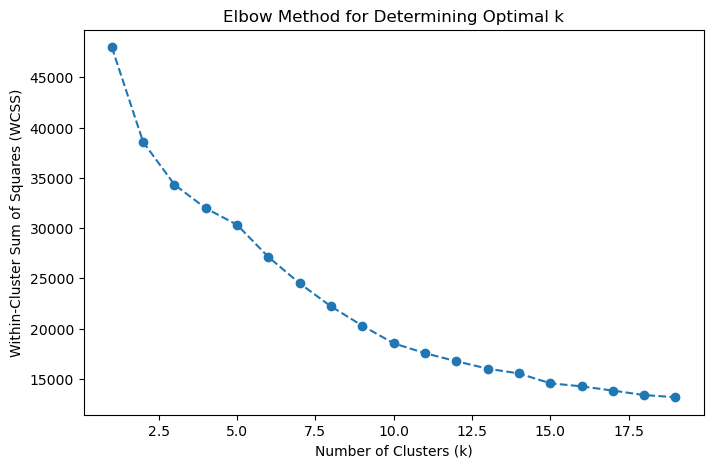

In [26]:
from sklearn.cluster import KMeans

wcss = []

k_values = range(1, 20)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Determining Optimal k')
plt.show()

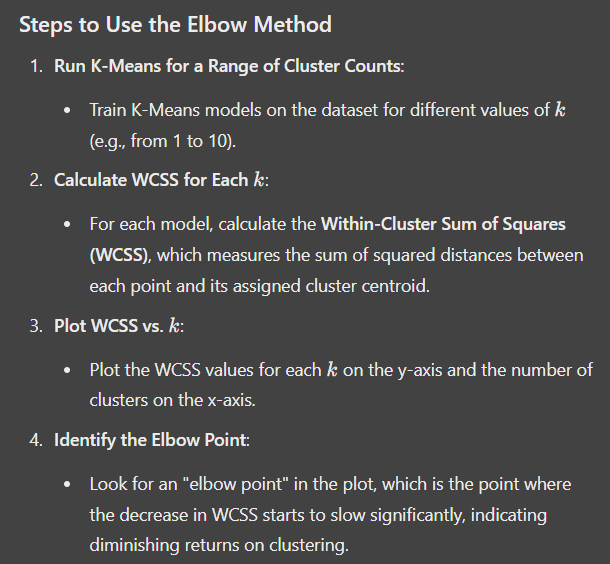